In [352]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from keras_tqdm import TQDMNotebookCallback
import copy
from keras import regularizers

In [414]:
data = []
unique = {}
index = 0
y_train = [] # one hots are in here
sizes = []
author_reviews_count = 0
authors = 35
#same_author = True
# officeData has 4905 unique authors
with open('officeDataEncoded.txt') as file:
    for line in file:
        author = line.split('\t')[0].rstrip('\n')
        r = line.split('\t')[1].rstrip('\n')[1:-1].split(',')

        vector = [float(x.strip(',')) for x in r if x != '']
        sizes.append(len(vector))
        
        if author not in unique:
            if len(unique) == authors:
                break
            unique[author] = np.zeros(authors)
            unique[author][index] = 1
            index += 1
            #same_author = False
        if len(vector) == 300:
            data.append(vector)
            y_train.append(unique[author])
            


#data = data

In [415]:
x_tr = []
y_tr = []
x_te = []
y_te = []
#print(data[0])
#print(y_train[0])
cur = y_train[0]
count = 0
for i in range(len(data)):
    if (y_train[i] == cur).all():
        # training set
        if count < 4:
            x_tr.append(data[i])
            y_tr.append(y_train[i])
        # test set
        else:
            x_te.append(data[i])
            y_te.append(y_train[i])

    else:
        #print('HEY')
        cur = y_train[i]
        count = 0
        # training set
        if count < 4:
            x_tr.append(data[i])
            y_tr.append(y_train[i])
        # test set
        else:
            x_te.append(data[i])
            y_te.append(y_train[i])
    count += 1
        

In [416]:

#print(y_tr[0:4])
#print(y_te[5])
x1 = copy.deepcopy(x_tr)
y1 = copy.deepcopy(y_tr)
#for x in range(2):
#    for i in x1:
#        x_tr.append(i)
#    for i in y1:
#        y_tr.append(i)
print(len(x_tr))
print(len(y_tr))
print(len(x_te))
print(len(y_te))

'''
for i in y_tr:
    print(i)
print('*'*12)
for i in y_te:
    print(i)
'''

140
140
239
239


"\nfor i in y_tr:\n    print(i)\nprint('*'*12)\nfor i in y_te:\n    print(i)\n"

In [417]:
from sklearn.utils import shuffle
x_training,y_training = shuffle(x_tr,y_tr, random_state=0)
#x_test = x_training[:150]
#y_test = y_training[:150]
#x_training = x_training[150:]
#y_training = y_training[150:]
# =====================================================
# =====================================================
x_training = np.array(x_tr)
print(x_training.shape)
# convert the 2d to 3d representation
x_training = x_training.reshape(x_training.shape + (1,))
print(x_training.shape)
output_shape = x_training.shape[1]
input_shape = x_training.shape[2]
y_training = np.array(y_tr)
print('X_training shape: ' + str(x_training.shape))
# =====================================================
# =====================================================

(140, 300)
(140, 300, 1)
X_training shape: (140, 300, 1)


In [418]:
## CURRENT MODEL
model = keras.Sequential()

#model.add(keras.layers.Conv1D(300, kernel_size=(3),strides=(1),
#                 activation='relu',
#                 #kernel_regularizer=regularizers.l2(0.01),
#                 #activity_regularizer=regularizers.l1(0.01),
#                 input_shape=[output_shape,
#                              input_shape]))

model.add(keras.layers.Dense(300,
                             activation='relu',
                             #kernel_regularizer=regularizers.l2(0.01),
                             #activity_regularizer=regularizers.l1(0.01),
                             input_shape=[output_shape,input_shape]))
'''
model.add(keras.layers.Conv1D(300, kernel_size=(3),
                 activation='relu',
                 #kernel_regularizer=regularizers.l2(0.01),
                 #activity_regularizer=regularizers.l1(0.01),
                 input_shape=[output_shape,
                              input_shape]))

model.add(keras.layers.Conv1D(300, kernel_size=(4),
                 activation='relu',
                 #kernel_regularizer=regularizers.l2(0.01),
                 #activity_regularizer=regularizers.l1(0.01),
                 input_shape=[output_shape,
                              input_shape]))

model.add(keras.layers.Conv1D(300, kernel_size=(5),
                 activation='relu',
                 #kernel_regularizer=regularizers.l2(0.01),
                 #activity_regularizer=regularizers.l1(0.01),
                 input_shape=[output_shape,
                              input_shape]))

#model.add(keras.layers.MaxPooling1D())
#model.add(keras.layers.Flatten())
# not sure if this is needed ...
model.add(keras.layers.SimpleRNN(200, activation='relu', use_bias=True, 
                       kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
                       bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, 
                       bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, 
                       recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, 
                       return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False))
'''
#model.add(keras.layers.MaxPooling1D())
model.add(keras.layers.Flatten())
#model.add(keras.layers.MaxPooling1D())
#model.add(keras.layers.Flatten())
#model.add(keras.layers.Dense(300, activation='relu'))
#model.add(keras.layers.Dropout(.75, noise_shape=None, seed=None))
#model.add(keras.layers.Dense(300, activation='relu'))
#model.add(keras.layers.Dropout(.25, noise_shape=None, seed=None))
model.add(keras.layers.Dense(y_training.shape[1], activation='softmax'))

#sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss=keras.losses.categorical_crossentropy,
    #optimizer = sgd,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_164 (Dense)            (None, 300, 300)          600       
_________________________________________________________________
flatten_69 (Flatten)         (None, 90000)             0         
_________________________________________________________________
dense_165 (Dense)            (None, 35)                3150035   
Total params: 3,150,635
Trainable params: 3,150,635
Non-trainable params: 0
_________________________________________________________________


In [419]:
batch_size = 5
epochs = 5
history = model.fit(x_training, y_training,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    shuffle=True,
    callbacks=[TQDMNotebookCallback()],
    validation_split = 0.2)

#x_te = np.array(x_te)

#score = model.evaluate(x_te, np.array([y_te]), verbose=1)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

HBox(children=(IntProgress(value=0, description='Training', max=5), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=112), HTML(value='')))

In [420]:
print(x_training.shape)
print(y_training.shape)
x_te = np.array(x_te)
x_te = x_te.reshape(x_te.shape + (1,))
print(x_te.shape)
y_te = np.array(y_te)
print(y_te.shape)

(140, 300, 1)
(140, 35)
(239, 300, 1)
(239, 35)


In [289]:
score = model.evaluate(x_te, y_te, verbose=1)
preds = model.predict_on_batch(x_training)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

39/39 [==============================] - 1s 30ms/step
Test loss: 3.3630230182256455
Test accuracy: 0.10256410256410256


239/239 [==============================] - 1s 3ms/step
Test loss: 5.052457350567295
Test accuracy: 0.13389121338912133


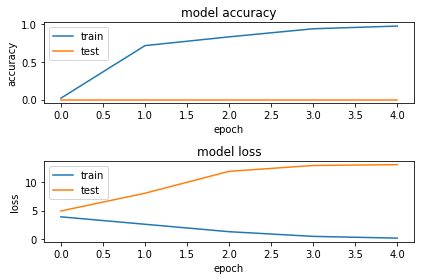

In [421]:
score = model.evaluate(x_te, y_te, verbose=1)
preds = model.predict_on_batch(x_te)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

In [413]:
'''
for y in range(0,len(preds)):
    m = max(preds[y][0:500])
    index = 0
    for i in range(0,500): #preds[0][0:500]:
        if preds[0][i] == m:
            index = i
    print(index)
'''

def get_auth(l):
    #l = list(l)
    for i in unique:
        if (unique[i] == l).all():
            return i

#m = max(preds[120])
print(len(preds[0]))
index = 0
incorrect = 0
correct = 0
for i in range(len(preds)): #preds[0][0:500]:
    m = max(preds[i])
    index = list(preds[i]).index(m)
    l = np.zeros(authors)
    l[index] = 1
    #print(get_auth(l))
    print(preds[i],index,y_te[i],'Guessed:',get_auth(l),'Actual:',get_auth(y_te[i]),end=' ')
    #for auth in unique:
    #if unique[auth][index] == 1:
    #    print('True')
    #else:
    #    print('False')
        #print(auth)
    if y_te[i][index] == 1:
        print('Correct')
        correct += 1
    else:
        print('Incorrect')
        incorrect += 1

print('Correct:',correct,'Incorrect:',incorrect,'Out of:',(correct+incorrect))
    


3
[0.6967577  0.25450888 0.04873339] 0 [1. 0. 0.] Guessed: A1A1BM6N28X9J0 Actual: A1A1BM6N28X9J0 Correct
[0.60740894 0.38322026 0.00937081] 0 [1. 0. 0.] Guessed: A1A1BM6N28X9J0 Actual: A1A1BM6N28X9J0 Correct
[0.7727145  0.20644398 0.02084148] 0 [1. 0. 0.] Guessed: A1A1BM6N28X9J0 Actual: A1A1BM6N28X9J0 Correct
[0.6575206  0.3240183  0.01846117] 0 [1. 0. 0.] Guessed: A1A1BM6N28X9J0 Actual: A1A1BM6N28X9J0 Correct
[0.5216524  0.46661386 0.01173378] 0 [1. 0. 0.] Guessed: A1A1BM6N28X9J0 Actual: A1A1BM6N28X9J0 Correct
[0.5536504  0.42456606 0.02178355] 0 [1. 0. 0.] Guessed: A1A1BM6N28X9J0 Actual: A1A1BM6N28X9J0 Correct
[0.46869394 0.5175874  0.01371858] 1 [1. 0. 0.] Guessed: A1A2F1ZOWOPNJB Actual: A1A1BM6N28X9J0 Incorrect
[0.5687774  0.40640828 0.02481436] 0 [1. 0. 0.] Guessed: A1A1BM6N28X9J0 Actual: A1A1BM6N28X9J0 Correct
[0.70534563 0.2721045  0.02254987] 0 [1. 0. 0.] Guessed: A1A1BM6N28X9J0 Actual: A1A1BM6N28X9J0 Correct
[0.6201411  0.3526678  0.02719113] 0 [1. 0. 0.] Guessed: A1A1BM6N28X9